In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline

import xgboost
import shap

import matplotlib.pyplot as plt
import seaborn as sns

/Users/brianroepke/miniforge3/envs/ML/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/brianroepke/miniforge3/envs/ML/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv("bank.csv", delimiter=";")

In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
le = LabelEncoder()

df['job'] = le.fit_transform(df['job'].astype(str))
df['marital'] = le.fit_transform(df['marital'].astype(str))
df['marital'] = le.fit_transform(df['marital'].astype(str))

In [7]:
column_trans = ColumnTransformer(transformers=
        [('num', MinMaxScaler(), selector(dtype_exclude="object")),
        ('cat', OrdinalEncoder(), selector(dtype_include="object"))],
        remainder='drop')

In [8]:
clf = xgboost.XGBRegressor()

pipeline = Pipeline([('prep',column_trans),
                        ('clf', clf)])

In [9]:
y = le.fit_transform(y)

In [10]:
# Split the data into 30% test and 70% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
pipeline.fit(X_train, y_train);

# SHAP

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


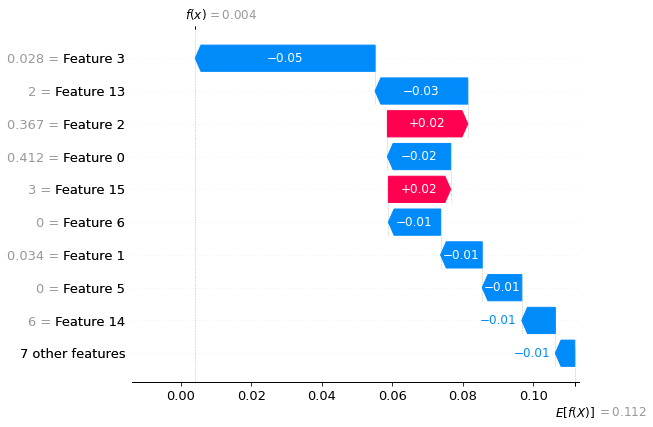

In [17]:
# train an XGBoost model
# X, y = shap.datasets.boston()
model = pipeline['clf']

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(pipeline['prep'].transform(X_train))

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

In [ ]:
for i in range (len(X.columns)):
    print(f"Feature {i}: {X.columns[i]}")

Feature 0: age
Feature 1: job
Feature 2: marital
Feature 3: education
Feature 4: default
Feature 5: balance
Feature 6: housing
Feature 7: loan
Feature 8: contact
Feature 9: day
Feature 10: month
Feature 11: duration
Feature 12: campaign
Feature 13: pdays
Feature 14: previous
Feature 15: poutcome


In [40]:
shap.initjs()
# visualize the first prediction's explanation
shap.plots.force(shap_values[0])

In [41]:
# visualize all the training set predictions
shap.plots.force(shap_values)

shap.plots.force is slow for many thousands of rows, try subsampling your data.


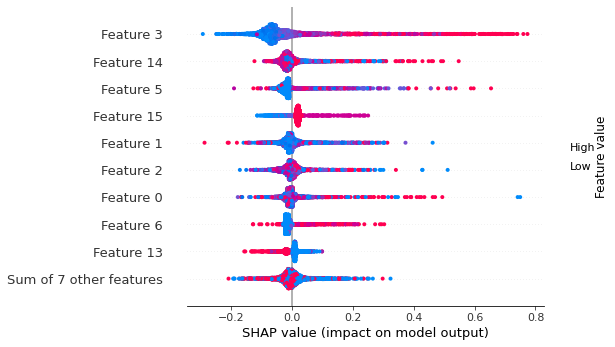

In [42]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

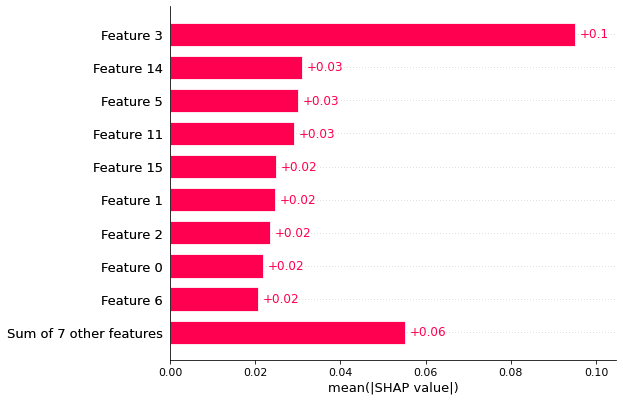

In [43]:
shap.plots.bar(shap_values)